In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import world_trade_data as wits
import requests

### Hosting the Olympics have trade boosting effect exports go ~ higher by 30%

In [8]:
# Specify years of interest
years = [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

bra_imports = []
bra_exports = []

for year in years:
    
    # To begin with, we request the values for the corresponding import and exports.
    # Here, we use the default value for partner='wld', and the default value for product='all'.
    curr_imp = wits.get_indicator('MPRT-TRD-VL', reporter='bra', year=f'{year}')
    curr_exp = wits.get_indicator('XPRT-TRD-VL', reporter='bra', year=f'{year}')
    
    # Remove the first levels of the index
    curr_imp = curr_imp.loc['Annual'].loc['Brazil'].loc['World']
    curr_exp = curr_exp.loc['Annual'].loc['Brazil'].loc['World']
    
    # Rebind Multi level df.index to the ProductCode
    curr_imp.index = curr_imp.index.get_level_values(0)
    curr_exp.index = curr_exp.index.get_level_values(0)
    
    # Get Values for total import/export for the year    
    imp = curr_imp.loc["All Products"]['Value']
    exp = curr_exp.loc["All Products"]['Value']
    
    bra_imports.append(imp)
    bra_exports.append(exp)

bra_imports

[47242654.093,
 48325649.661,
 62835613.536,
 73600375.464,
 91342783.548,
 120617439.7,
 172984767.614,
 127722340.412,
 181768424.09,
 226246755.801,
 223183474.672,
 239747515.987,
 229154460.893,
 171446211.662,
 137552002.466,
 150749493.921,
 181230498.358,
 177347934.749]

In [9]:
trade_df = pd.DataFrame({
    "Import": bra_imports,
    "Export": bra_exports
}, index = years)
trade_df

,Import,Export
2002,4.724265e+07,6.043865e+07
2003,4.832565e+07,7.320322e+07
2004,6.283561e+07,9.667725e+07
2005,7.360038e+07,1.185287e+08
2006,9.134278e+07,1.378062e+08
2007,1.206174e+08,1.606489e+08
2008,1.729848e+08,1.979424e+08
2009,1.277223e+08,1.529947e+08
2010,1.817684e+08,2.019151e+08
2011,2.262468e+08,2.560387e+08


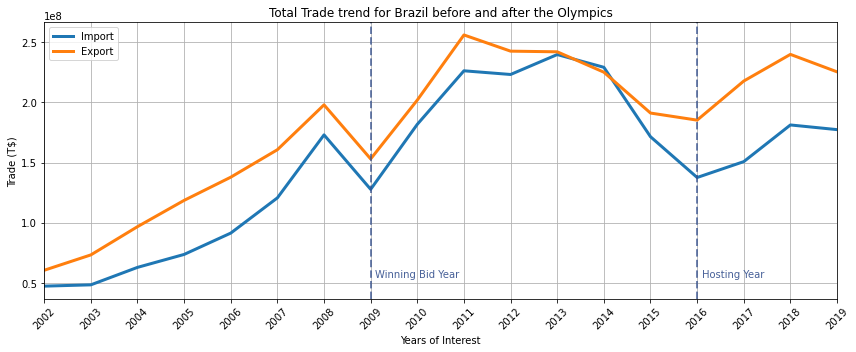

In [219]:
# Build chart to show trend tendency

# # DataFrame for chart - purpose to display money data better
# trade_plot_df = pd.DataFrame(trade_df)
# trade_plot_df = trade_plot_df.apply(lambda x: '%.5f' % x, axis=1)
# trade_plot_df

tick_locations = [x for x in years]
tick_locations
fig,ax = plt.subplots()
trade_plot = trade_df.plot(kind = "line", figsize=(12,5), lw = 3, grid = True, ax=ax)
trade_plot.set_xticks(tick_locations)
trade_plot.set_xticklabels(years, rotation=45)

year_of_interest = [2009,2016]
for year in year_of_interest:
    ax.axvline(year, color='#334f8d', alpha = 0.7, linestyle="--", lw=2)
    

ax.text(x=2009.1, y=0.55*1e8, s="Winning Bid Year", alpha=0.9, color='#334f8d')

ax.text(x=2016.1, y=0.55*1e8, s="Hosting Year", alpha=0.9, color='#334f8d')

# ax.axvline(2009, color='#334f8d', alpha = 0.5, linestyle="--", lw=2)
#            label="Winning Bid Year")
# ax2.axvline(2016, color="orange", linestyle="-", lw=2, label="Hosting Year")
# ax.axvline(2016, color='#334f8d', alpha = 0.5, linestyle="--", lw=2)

# plt.legend()
# plt.xlim(0, len(years))
trade_plot.set_ylabel("Trade (T$)")
trade_plot.set_xlabel("Years of Interest")
plt.xlim(2002, 2019)
plt.title("Total Trade trend for Brazil before and after the Olympics")
plt.tight_layout()

In [185]:
# Olympic effect. Hosting the Olympics boosts trade. Calculate mean for previous years first
trade_beforeBid = trade_df.loc[trade_df.index<2009].mean()
trade_beforeBid

Import    8.813561e+07
Export    1.207493e+08
dtype: float64

In [89]:
# # Calculate the increase of trade in percentage after winning the bid
# import_increase = (trade_df.loc[2008,'Import']-trade_before["Import"])*100/trade_before['Import']
# import_increase
# # trade_df[trade_df[2008]]

133.7818830726833

In [186]:
# Hypothesis test. Calculate mean for years after bid
trade_afterBid = trade_df.loc[(trade_df.index>=2009)&(trade_df.index<2016)].mean()
trade_afterBid

Import    1.998956e+08
Export    2.159693e+08
dtype: float64

In [229]:
# Calculate the average increase of trade in percentage after year winning the bid
average_export_increasebid = trade_afterBid['Export']-trade_beforeBid["Export"]

export_increase_bid = average_export_increasebid/trade_beforeBid['Export']*100
export_increase_bid

average_import_increasebid = trade_afterBid['Import']-trade_beforeBid["Import"]

import_increase_bid = average_import_increasebid/trade_beforeBid['Import']*100
import_increase_bid
# trade_df[trade_df[2008]]

126.80457221957478

In [188]:
# Calculate mean for years after olympics
trade_afterHost = trade_df.loc[trade_df.index>=2016].mean()
trade_afterHost

Import    1.617200e+08
Export    2.170615e+08
dtype: float64

In [228]:
# Calculate the average increase of trade in percentage after hosting
average_export_increasehost = trade_afterHost['Export']-trade_beforeBid["Export"]

export_increase_host = average_export_increasehost/trade_beforeBid['Export']*100
export_increase_host

average_import_increasehost = trade_afterHost['Import']-trade_beforeBid["Import"]

import_increase_host = average_import_increasehost/trade_beforeBid['Import']*100
import_increase_host

83.48994101743725

In [190]:
# Test increase after host comparing to after bid
average_export_increasehostbid = trade_afterHost['Export']-trade_afterBid["Export"]

export_increase_host = average_export_increasehostbid/trade_afterBid['Export']*100
export_increase_host

0.5057210551541074

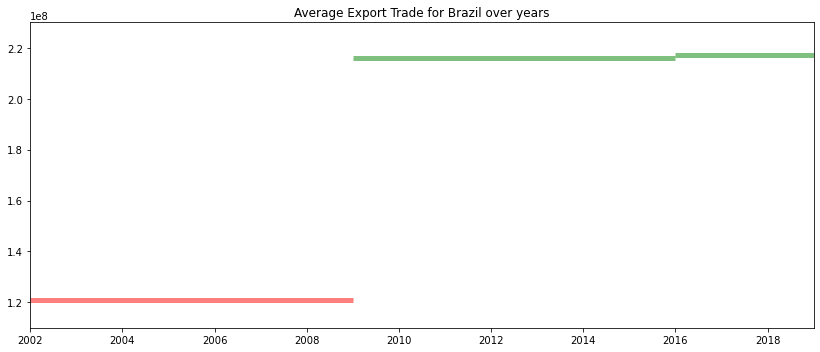

In [192]:
# Draw plot to show trade mean in three periods - before bid, after bid and after hosting

# ----------------------this is to use lines
y_valuesExp = [trade_beforeBid["Export"],
              trade_afterBid["Export"], trade_afterHost["Export"]]
x_valuesExp_max = [2009, 2016, 2019]
x_valuesExp_min = [2002, 2009, 2016]

fig, ax = plt.subplots()
fig.set_size_inches(11.5, 5)

# Horizontal lines
ax.hlines(y_valuesExp, x_valuesExp_min, x_valuesExp_max, linestyles = "solid", lw=5,
          alpha = 0.5, edgecolors=["red", "green", "green"])

ax.set_title('Average Export Trade for Brazil over years')

plt.xlim(2002, 2019)
plt.ylim(1.1*1e8, 2.3*1e8)

plt.tight_layout()
plt.show()
# ------------------


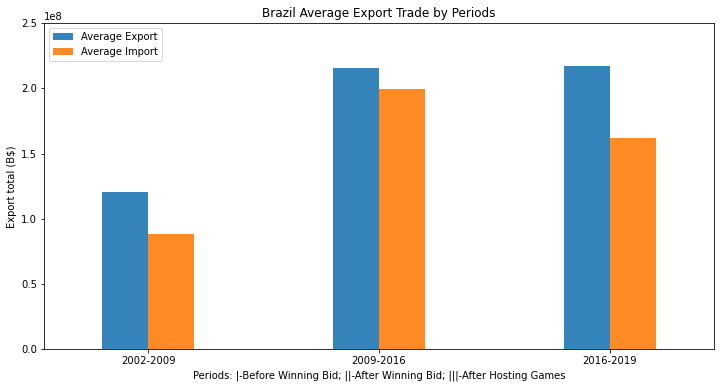

In [226]:
# Draw bar plot to show trade mean in three periods - before bid, after bid and after hosting

y_valuesExp = [trade_beforeBid["Export"],
              trade_afterBid["Export"], trade_afterHost["Export"]]

y_valuesImp = [trade_beforeBid["Import"],
              trade_afterBid["Import"], trade_afterHost["Import"]]

x_values = ["2002-2009", "2009-2016", "2016-2019"]

aver_trade_df = pd.DataFrame({
    "Average Export": y_valuesExp,
    "Average Import": y_valuesImp,
}, index = x_values)

aver_trade_df.plot(kind = "bar", figsize=(12,6), width = 0.4, alpha = 0.9)

plt.xticks(rotation="horizontal", horizontalalignment="center")
plt.title("Brazil Average Export Trade by Periods")
plt.xlabel("Periods: |-Before Winning Bid; ||-After Winning Bid; |||-After Hosting Games")
plt.ylabel("Export total (B$)")

plt.ylim(0, 2.5*1e8)
plt.legend(loc="upper left")

# plt.tight_layout()
# plt.show()


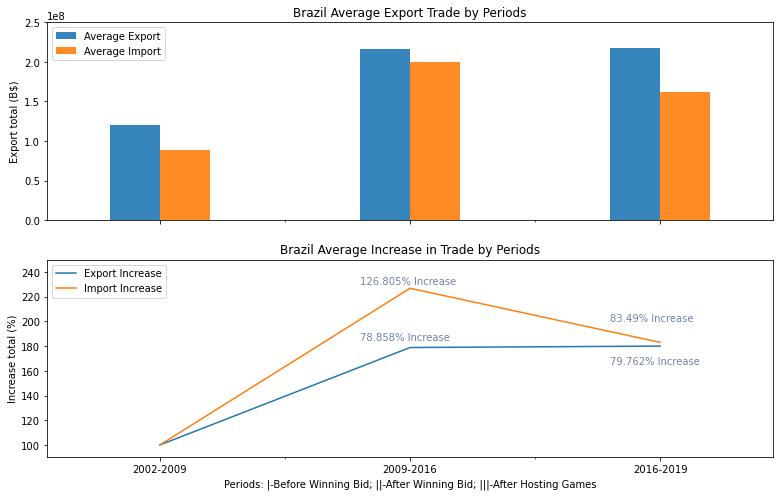

In [252]:
# Plot both - Bar chart with trend and Line chart with increase percentage

# Create DataFrames to plot Charts

# Create Bar DF
y_valuesExp = [trade_beforeBid["Export"],
              trade_afterBid["Export"], trade_afterHost["Export"]]

y_valuesImp = [trade_beforeBid["Import"],
              trade_afterBid["Import"], trade_afterHost["Import"]]

x_values = ["2002-2009", "2009-2016", "2016-2019"]

aver_trade_df = pd.DataFrame({
    "Average Export": y_valuesExp,
    "Average Import": y_valuesImp,
}, index = x_values)


# Create Line DF
y_valExpIncr = [100, 100+round(export_increase_bid, 3), 100+round(export_increase_host)]
y_valImpIncr = [100, 100+round(import_increase_bid, 3), 100+round(import_increase_host)]
y_valExpIncr

incr_trade_df = pd.DataFrame({
    "Export Increase": y_valExpIncr,
    "Import Increase": y_valImpIncr,
}, index = x_values)


# Define function to add labels on graph
# def addlabels(ax,x,y):
#     for i in range(len(x)):
#         ax.text(x=2007, y=0.95*1e8, s="Winning Bid Year", alpha=0.7, color='#334f8d')
#         ax.text(i, y[i], y[i], ha = 'center')

figure, axes = plt.subplots(nrows=2, sharex=True, sharey=False)

#Plot Bar Chart 
aver_trade_df.plot(kind = "bar", figsize=(13,8), width = 0.4, alpha = 0.9, ax=axes[0])
axes[0].set_ylabel("Export total (B$)")
axes[0].set_ylim(0, 2.5*1e8)
axes[0].set_title("Brazil Average Export Trade by Periods")


# Plot Line Chart
incr_trade_df.plot(ax=axes[1])

# Add Line Values
axes[1].text(x=0.8, y=230, s=f"{round(import_increase_bid, 3)}% Increase", alpha=0.7, color='#334f8d')
axes[1].text(x=1.8, y=200, s=f"{round(import_increase_host, 3)}% Increase", alpha=0.7, color='#334f8d')
axes[1].text(x=0.8, y=185, s=f"{round(export_increase_bid, 3)}% Increase", alpha=0.7, color='#334f8d')
axes[1].text(x=1.8, y=165, s=f"{round(export_increase_host, 3)}% Increase", alpha=0.7, color='#334f8d')

axes[1].set_ylabel("Increase total (%)")
axes[1].set_title("Brazil Average Increase in Trade by Periods")
axes[1].set_ylim(90, 250)

plt.xticks(rotation="horizontal", horizontalalignment="center")

plt.xlabel("Periods: |-Before Winning Bid; ||-After Winning Bid; |||-After Hosting Games")
plt.legend(loc="upper left")

# plt.tight_layout()
# plt.show()



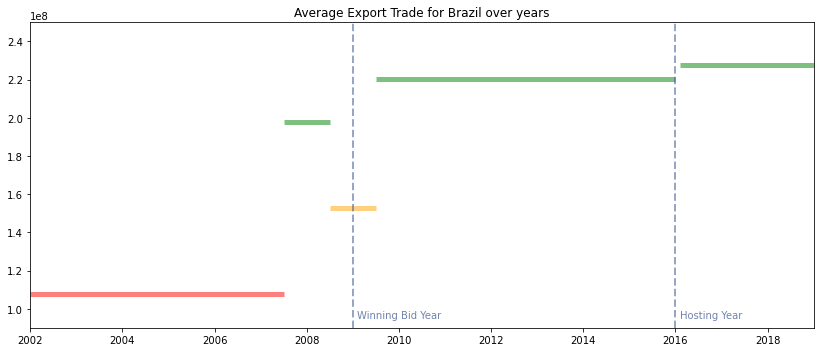

In [165]:
# Draw plot to show trade mean over time, include separete years to show in more details how hosting affects
# trade - the year before the winning the bid year it goes up, the bidding year - goes down


# Olympic effect. Hosting the Olympics boosts trade. Calculate mean for previous years first
trade_beforeBid = trade_df.loc[trade_df.index<2008].mean()
trade_beforeBid

# Hypothesis test. Calculate mean for years after bid
trade_afterBid = trade_df.loc[(trade_df.index>2009)&(trade_df.index<=2016)].mean()
trade_afterBid

y_valuesExp = [trade_beforeBid["Export"], trade_df.loc[2008,'Export'], trade_df.loc[2009,'Export'],
              trade_afterBid["Export"], trade_afterHost["Export"]]
# x_valuesExp = [(2007,2001), (2008.5,2007.5), (2009.5,2008.5), (2016, 2010), (2019,2016.5)]

x_valuesExp_max = [2007.5, 2008.5, 2009.5, 2016, 2019]
x_valuesExp_min = [2002, 2007.5, 2008.5, 2009.5, 2016.1]




fig, ax = plt.subplots()
fig.set_size_inches(11.5, 5)

# Horizontal lines
ax.hlines(y_valuesExp, x_valuesExp_min, x_valuesExp_max, linestyles = "solid", lw=5,
          alpha = 0.5, edgecolors=["red", "green", "orange", "green", "green"])

ax.text(x=2007, y=0.95*1e8, s="Winning Bid Year", alpha=0.7, color='#334f8d')

ax.text(x=2016.1, y=0.95*1e8, s="Hosting Year", alpha=0.7, color='#334f8d')

# Vertical lines
year_of_interest = [2009,2016]
for year in year_of_interest:
    ax.axvline(year, color='#334f8d', alpha = 0.5, linestyle="--", lw=2)
ax.text(x=2009.1, y=0.95*1e8, s="Winning Bid Year", alpha=0.7, color='#334f8d')

ax.text(x=2016.1, y=0.95*1e8, s="Hosting Year", alpha=0.7, color='#334f8d')

ax.set_title('Average Export Trade for Brazil over years')


# plt.hlines(y_valuesExp, x_valuesExp_min, x_valuesExp_max, linestyles = "solid")

# plt.hlines(y_valuesExp, x_valuesExp_min, x_valuesExp_max, linestyles = "solid")

# export_handle, = plt.plot(y_valuesExp, x_valuesExp_min, x_valuesExp_max,
#                           marker ='o', color='red', label="Export")

# export_handle, = plt.plot(marker ='o', color='red', label="Export")

# cosine_handle, = plt.plot(x_axis, cos, marker='^', color='red', label="Cosine")

# Adds a legend and sets its location to the lower right
# plt.legend(loc="lower right")

plt.xlim(2002, 2019)
plt.ylim(0.9*1e8, 2.5*1e8)

# plt.hlines(trade_beforeBid["Import"], 2007, 2001, linestyles = "solid")
plt.tight_layout()
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

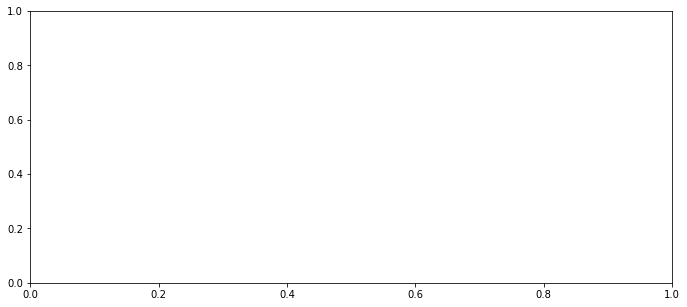

In [180]:
# Draw Bar plot to show trade mean over time
y_valuesExp = [trade_beforeBid["Export"], trade_df.loc[2008,'Export'], trade_df.loc[2009,'Export'],
              trade_afterBid["Export"], trade_afterHost["Export"]]
# x_valuesExp = [(2007,2001), (2008.5,2007.5), (2009.5,2008.5), (2016, 2010), (2019,2016.5)]

x_valuesExp_max = [2007.5, 2008.5, 2009.5, 2016, 2019]
x_valuesExp_min = [2002, 2007.5, 2008.5, 2009.5, 2016.1]




fig, ax = plt.subplots()
fig.set_size_inches(11.5, 5)

# Bar plot
x_axis = np.arange(len(years))
plt.bar(x_axis, y_valuesExp, linestyles = "solid", lw=5,
          alpha = 0.5, color = "red")

# export_plot.set_xticks(tick_locations)
# export_plot.set_xticklabels(years, rotation=45)

# Vertical lines
year_of_interest = [2009,2016]
for year in year_of_interest:
    ax.axvline(year, color='#334f8d', alpha = 0.5, linestyle="--", lw=2)
ax.text(x=2009.1, y=0.95*1e8, s="Winning Bid Year", alpha=0.7, color='#334f8d')

ax.text(x=2016.1, y=0.95*1e8, s="Hosting Year", alpha=0.7, color='#334f8d')

ax.set_title('Average Export Trade for Brazil over years')


# plt.hlines(y_valuesExp, x_valuesExp_min, x_valuesExp_max, linestyles = "solid")

# plt.hlines(y_valuesExp, x_valuesExp_min, x_valuesExp_max, linestyles = "solid")

# export_handle, = plt.plot(y_valuesExp, x_valuesExp_min, x_valuesExp_max,
#                           marker ='o', color='red', label="Export")

# export_handle, = plt.plot(marker ='o', color='red', label="Export")

# cosine_handle, = plt.plot(x_axis, cos, marker='^', color='red', label="Cosine")

# Adds a legend and sets its location to the lower right
# plt.legend(loc="lower right")

plt.xlim(2002, 2019)
plt.ylim(0.9*1e8, 2.5*1e8)

# plt.hlines(trade_beforeBid["Import"], 2007, 2001, linestyles = "solid")
plt.tight_layout()
plt.show()